# Non Linear Regression

### importing_libraries

In [418]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Downloading Dataset
- [data link](https://www.kaggle.com/datasets/antoniobrych/exp-integrals)

In [419]:
#downloading dataset
# !wget .csv

### Reading the data with pandas
- taking a look at the dataset and analyzing data

In [420]:
df = pd.read_csv("neural_integral.csv")
df.head(10) #View the beginning of the data
#tail is used for Viewing the end of the data

,Unnamed: 0,constant_value,integral_value
0,0,68.791738,16.022311
1,1,947.778157,138.132699
2,2,613.000047,95.351393
3,3,280.701744,49.616325
4,4,335.793701,57.559335
5,5,675.207844,103.485144
6,6,448.990904,73.356920
7,7,497.966368,80.019928
8,8,754.653106,113.737359
9,9,676.617609,103.668343


### Data Exploration

In [421]:
#data summary 
df.describe()

,Unnamed: 0,constant_value,integral_value
count,20000.000000,20000.000000,20000.000000
mean,9999.500000,502.202626,78.752909
std,5773.647028,288.850217,40.055344
min,0.000000,1.039024,1.019388
25%,4999.750000,252.483278,45.465122
50%,9999.500000,501.563838,80.505870
75%,14999.250000,752.143564,113.415645
max,19999.000000,999.930435,144.611448


### Plotting the Dataset

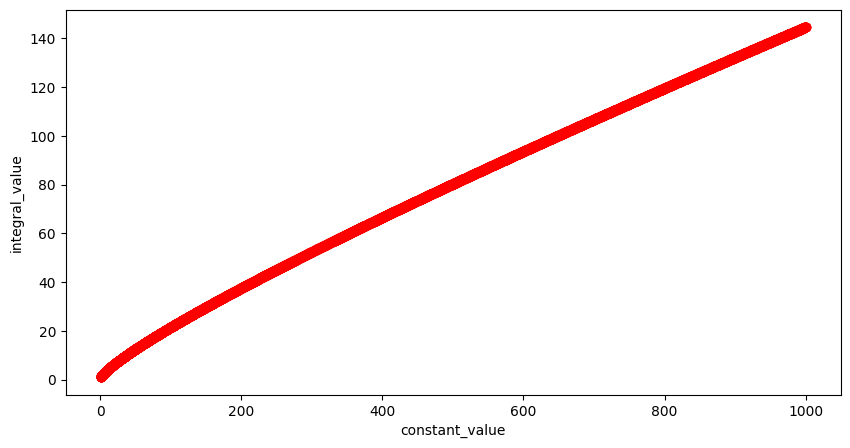

In [434]:
x_data, y_data = (df["constant_value"].values, df["integral_value"].values)
plt.figure(figsize=(10,5)) #size plt x,y
plt.plot(x_data, y_data, 'ro')
plt.xlabel('constant_value')
plt.ylabel('integral_value')
plt.show()

### selecting a model
- According to the plot model above, we can understand that it is similar to Logarithmic or polynomial

- the formula is used for the logistic function:
y = log(x)


/tmp/ipykernel_7370/1900424537.py:2: RuntimeWarning: invalid value encountered in log
  Y = np.log(X)


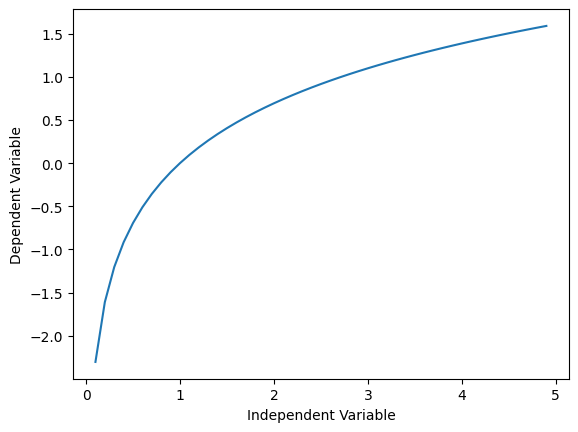

In [423]:
X = np.arange(-5.0, 5.0, 0.1)
Y = np.log(X)


plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()
# invalid value encountered in log: beacuse of having negative values inside the log

### Building The Model
- the formula is used for the logistic function:
a * log(x+b)

In [424]:
def sigmoid(x, a, b):
    return a * np.log(x + b)

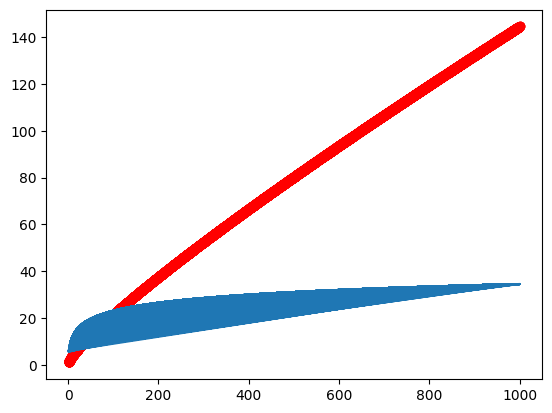

In [432]:
a = 5
b = 2
c = 0.3

#Logarithmic function
y_pred = sigmoid(x_data, a , b)

#plot initial prediction against datapoints
plt.plot(x_data, y_data, 'ro')
plt.plot(x_data, y_pred)

### normalizing x and y(obtaining 0-1):

In [426]:
xdata = x_data/max(x_data)
ydata = y_data/max(y_data)

In [435]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata , ydata) #curve_fit will obtain best result according to func,x,y

print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 1.400030, beta_2 = 1.001856


### drawing final plot
- linspace(): It produces a one-dimensional array between 2 and 5, which has 3 houses the first and last houses are 2 and 5, and the rest is divided

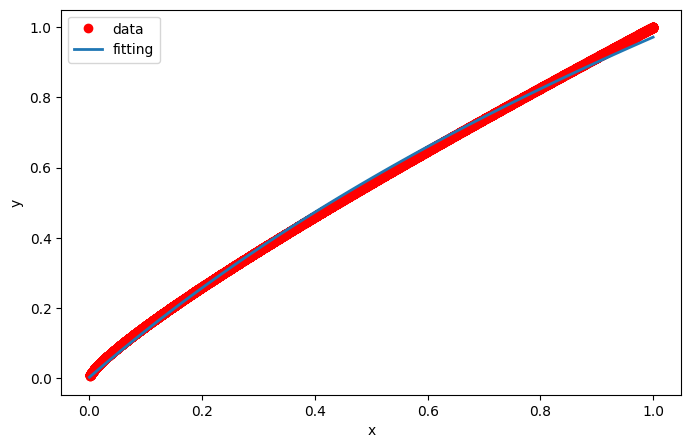

In [436]:
x = np.linspace(0, 10000, 55)
x = x/max(x) #normalizing 
y = sigmoid(x, *popt) # *popt = popt[0],popt[1]   | * puts two param in func
plt.figure(figsize=(8,5))
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=2.0, label='fitting') #linewidth is thickness
plt.legend(loc='best') #it shows data , fitting labels on plt
plt.ylabel('y')
plt.xlabel('x')
plt.show()

### Creating train and test dataset 
- 20 % for test and 80 for train

In [437]:
msk = np.random.rand(len(df)) < 0.80
train_x = xdata[msk]
train_y = ydata[msk]
test_x = xdata[~msk]
test_y = ydata[~msk]

### building the model using train set

In [438]:
popt, pcov = curve_fit(sigmoid, train_x, train_y)
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 1.400124, beta_2 = 1.001846


In [439]:
from sklearn.metrics import r2_score

predict = sigmoid(test_x, *popt) #y_hat

print("Mean absolute error: %.2f" % np.mean(np.absolute(predict - test_y)))
print("R2-score: %.2f" % r2_score(predict , test_y))
# print("Residual sum of squares (MSE): %.2f" % np.mean((predict - test_y) ** 2))

Mean absolute error: 0.01
R2-score: 1.00
